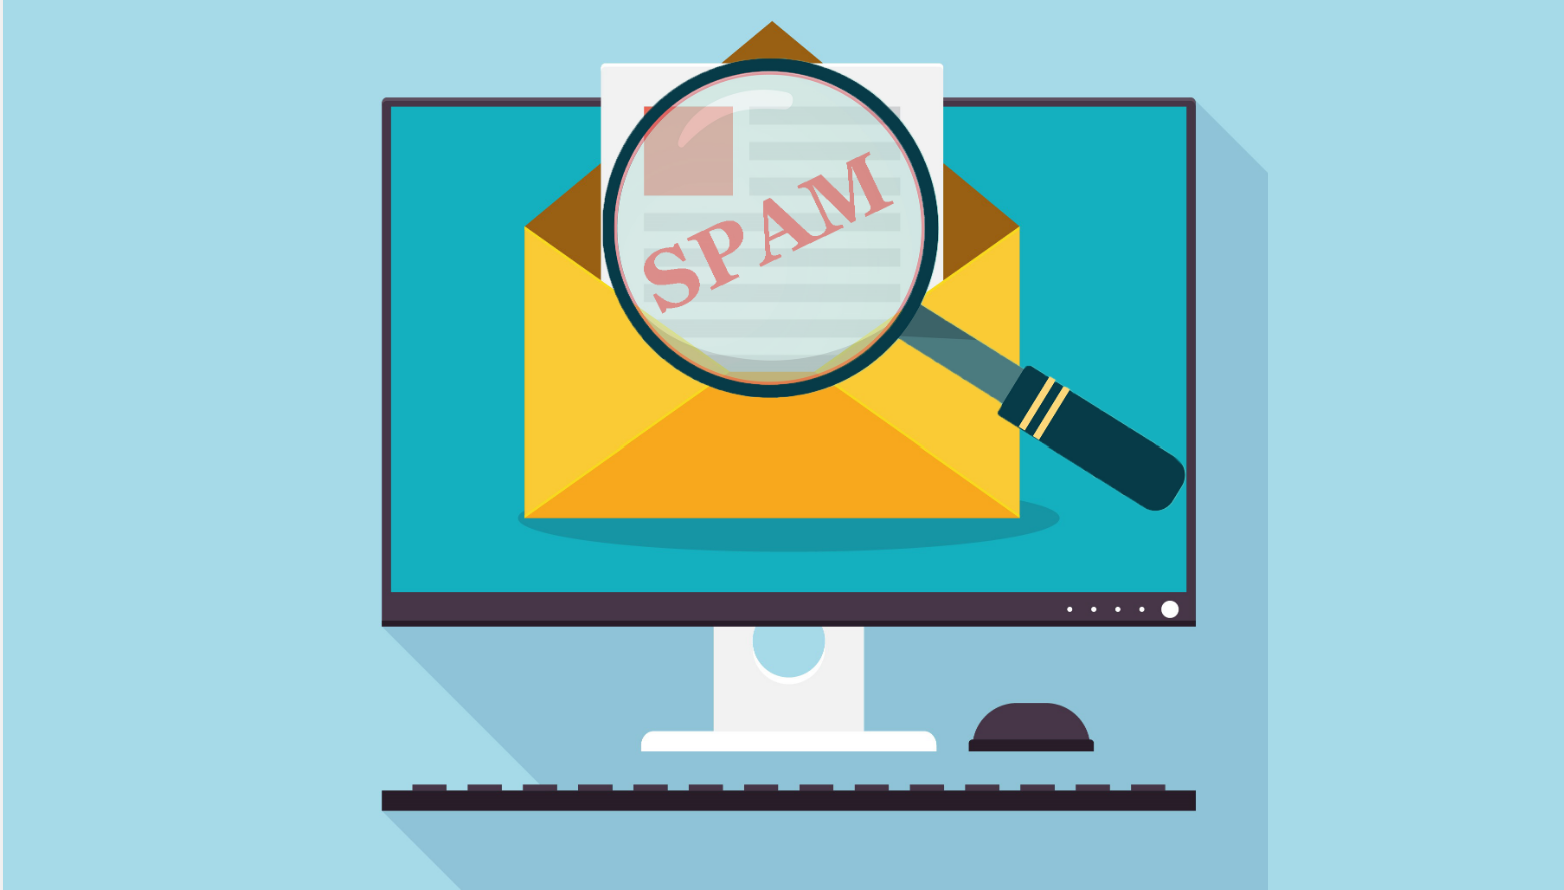

#Description:

* The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

* Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

* The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as spam or ham.

#Acknowledgements:
* This dataset has been referred from Kaggle.

#Objective:
* Understand the Dataset & cleanup (if required).
Build classification models to predict whether or not the email is spam.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


#Stractegic Plan of Action:
We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

* Data Exploration
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Data Manipulation
* Feature Selection/Extraction
* Predictive Modelling
* Project Outcomes & Conclusion

## 1. Data Exploration

In [1]:
#Importing the basic librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing the ML librarires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score , classification_report

In [3]:
#Load your dataset and load some dataset
data = pd.read_csv('/content/drive/MyDrive/Github_project_time/Spam.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#load last dataset
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
#describe summery
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
#check shape
data.shape

(4601, 58)

In [7]:
#check columns name
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [8]:
#describe mean,std,min,max
data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [9]:
#check null are present or not
data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [10]:
# select some specific columns
data[['capital_run_length_average','capital_run_length_longest','capital_run_length_total']]

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,3.756,61,278
1,5.114,101,1028
2,9.821,485,2259
3,3.537,40,191
4,3.537,40,191
...,...,...,...
4596,1.142,3,88
4597,1.555,4,14
4598,1.404,6,118
4599,1.147,5,78


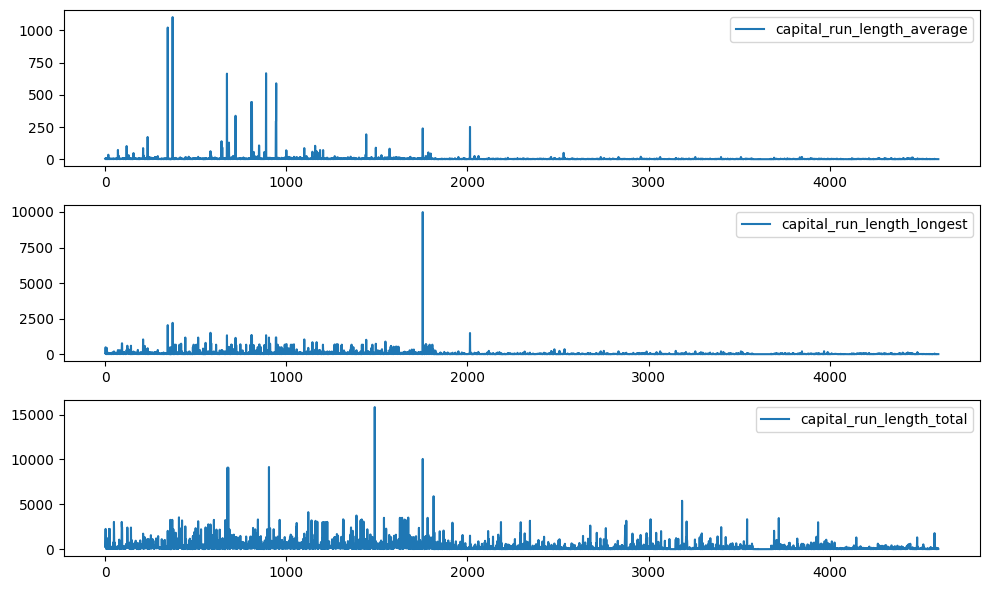

In [11]:
# Create a line plot for each variable
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(data.index, data['capital_run_length_average'], label='capital_run_length_average')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.index, data['capital_run_length_longest'], label='capital_run_length_longest')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data.index, data['capital_run_length_total'], label='capital_run_length_total')
plt.legend()

plt.tight_layout()
plt.show()

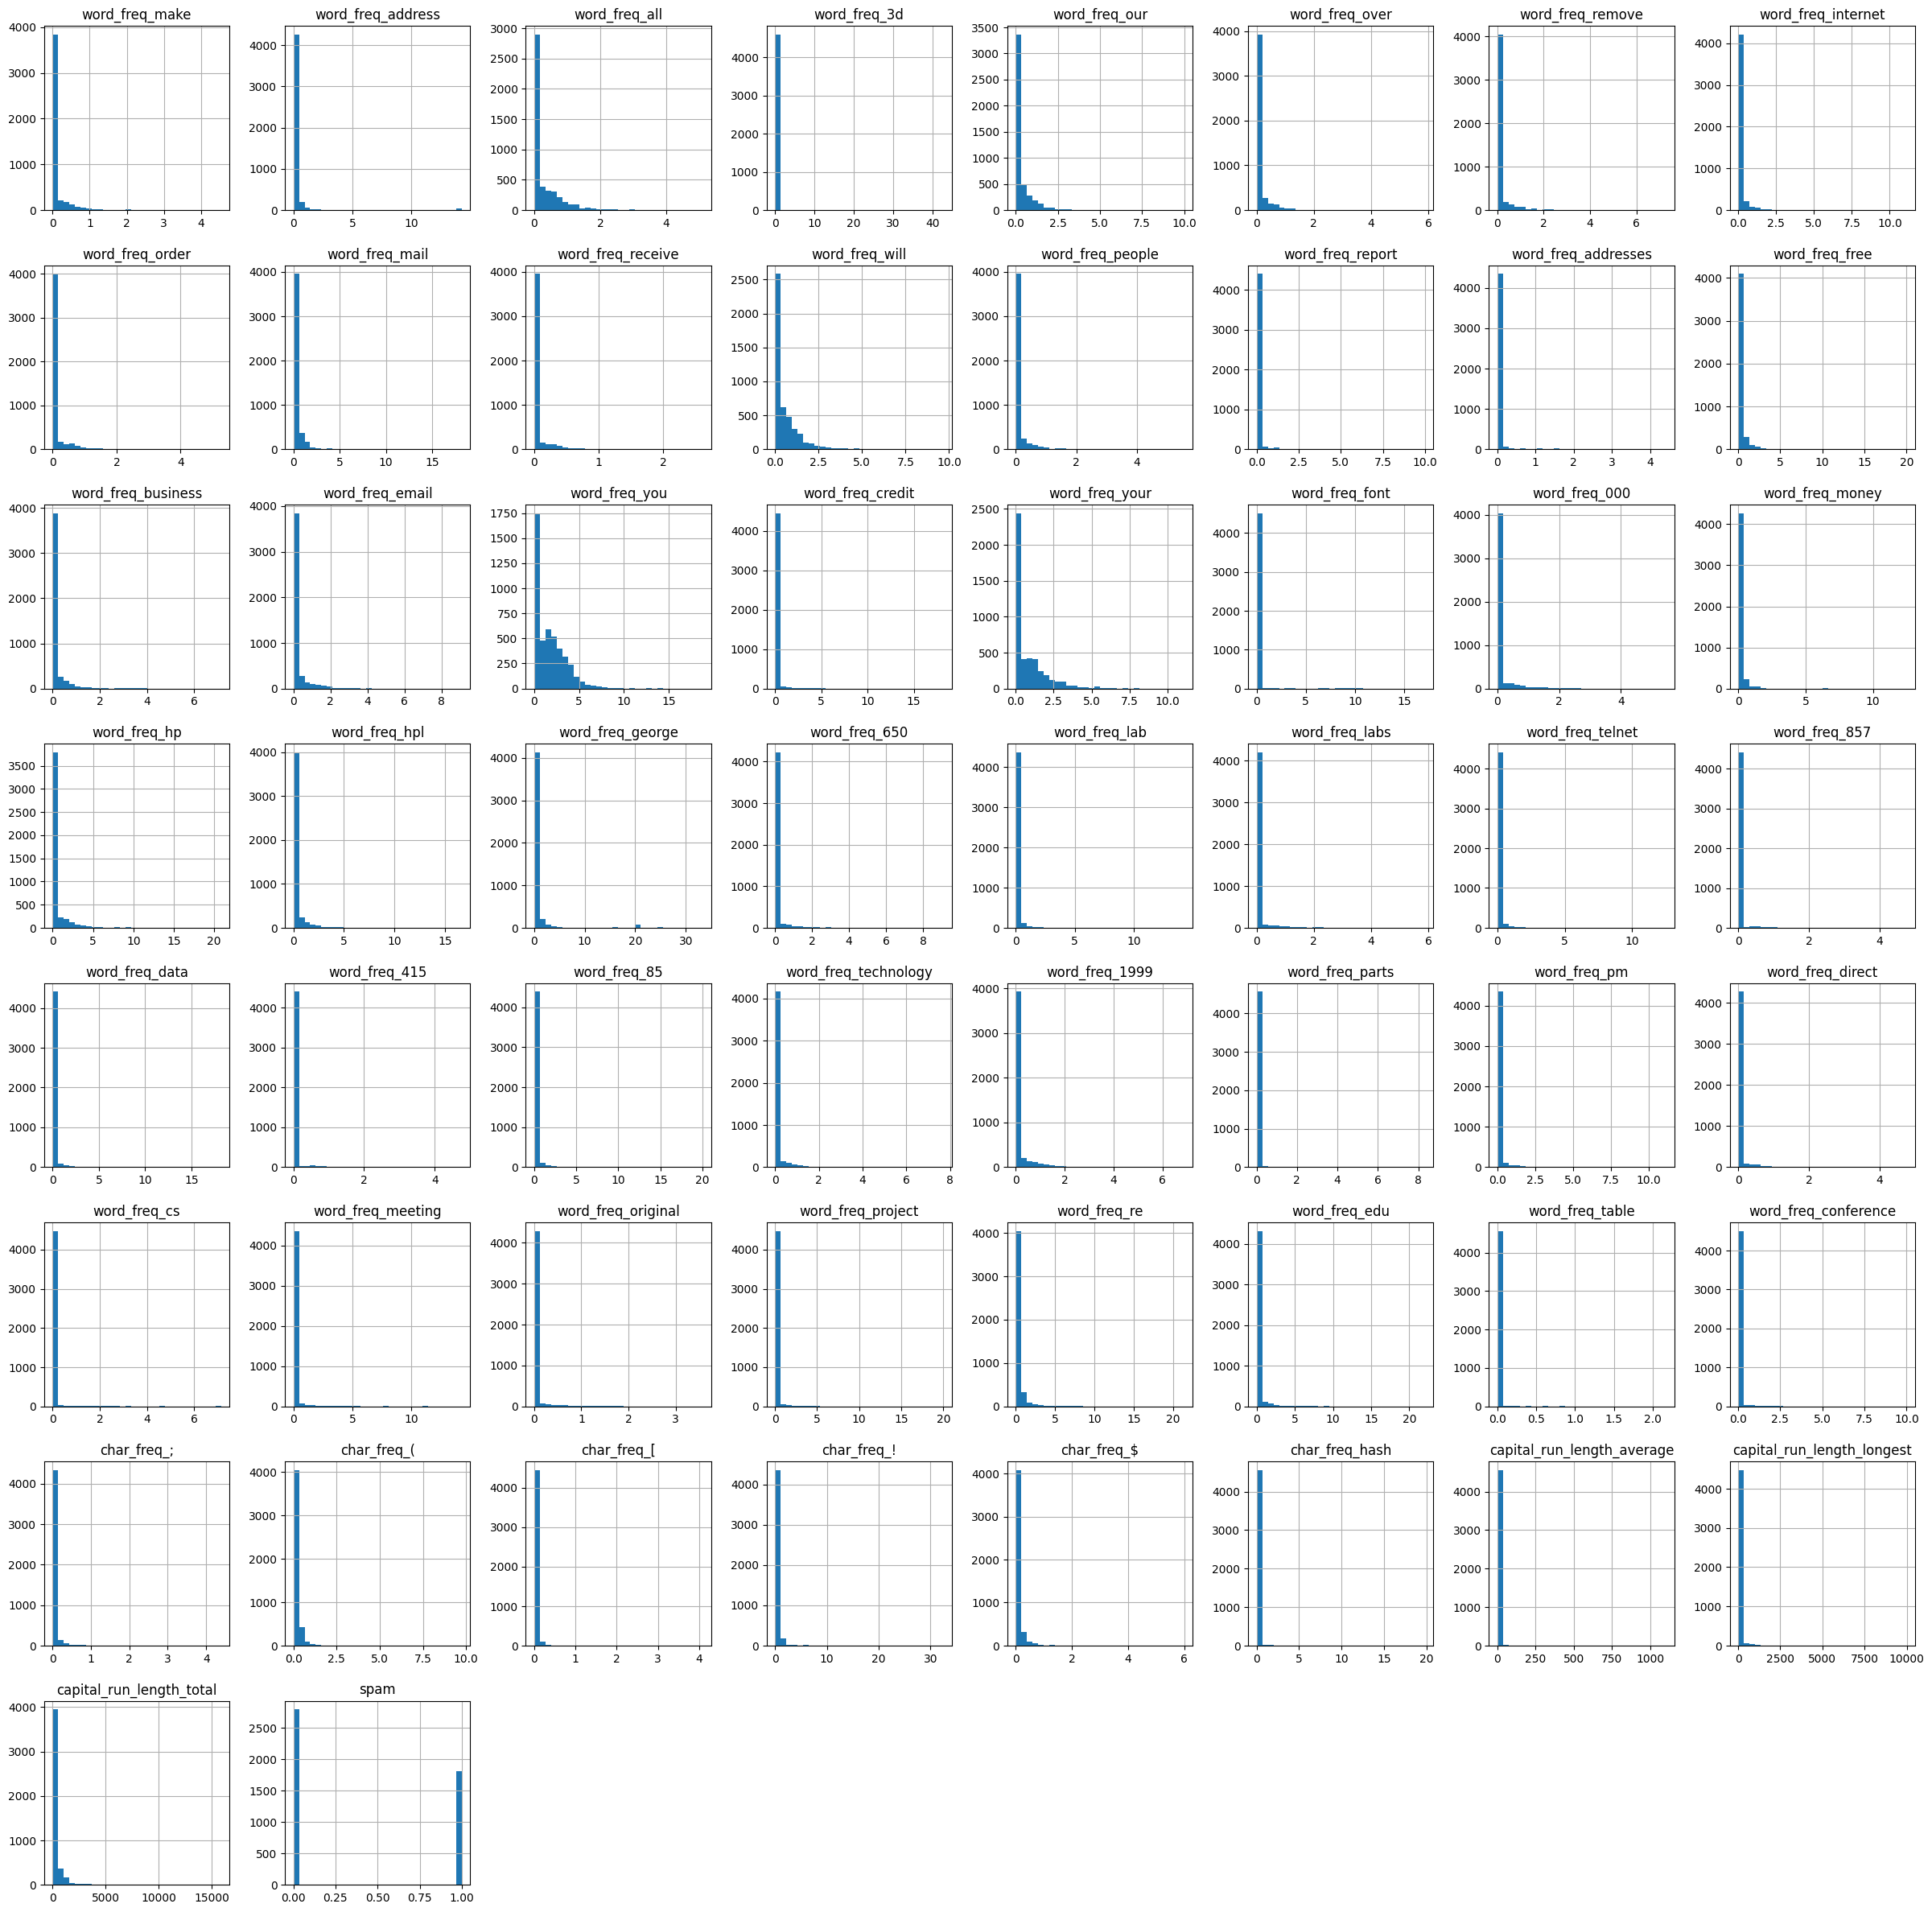

In [12]:
#A histogram can help you visualize the distribution of each variable separately.
data.hist(bins=30,figsize=(30,30));

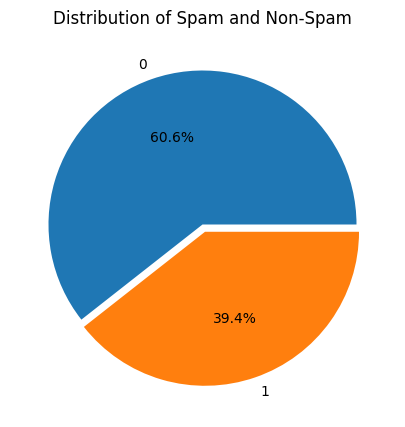

In [13]:
#create a pie chart to visualize the distribution of the "spam" variable in your dataset.
plt.figure(figsize = (10,5))
count = data['spam'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',explode=[0,0.05])
plt.title('Distribution of Spam and Non-Spam')
plt.show()

* "0" represents non-spam, and it accounts for approximately 60.6% of the data.
* "1" represents spam, and it accounts for approximately 39.4% of the data.

<Axes: >

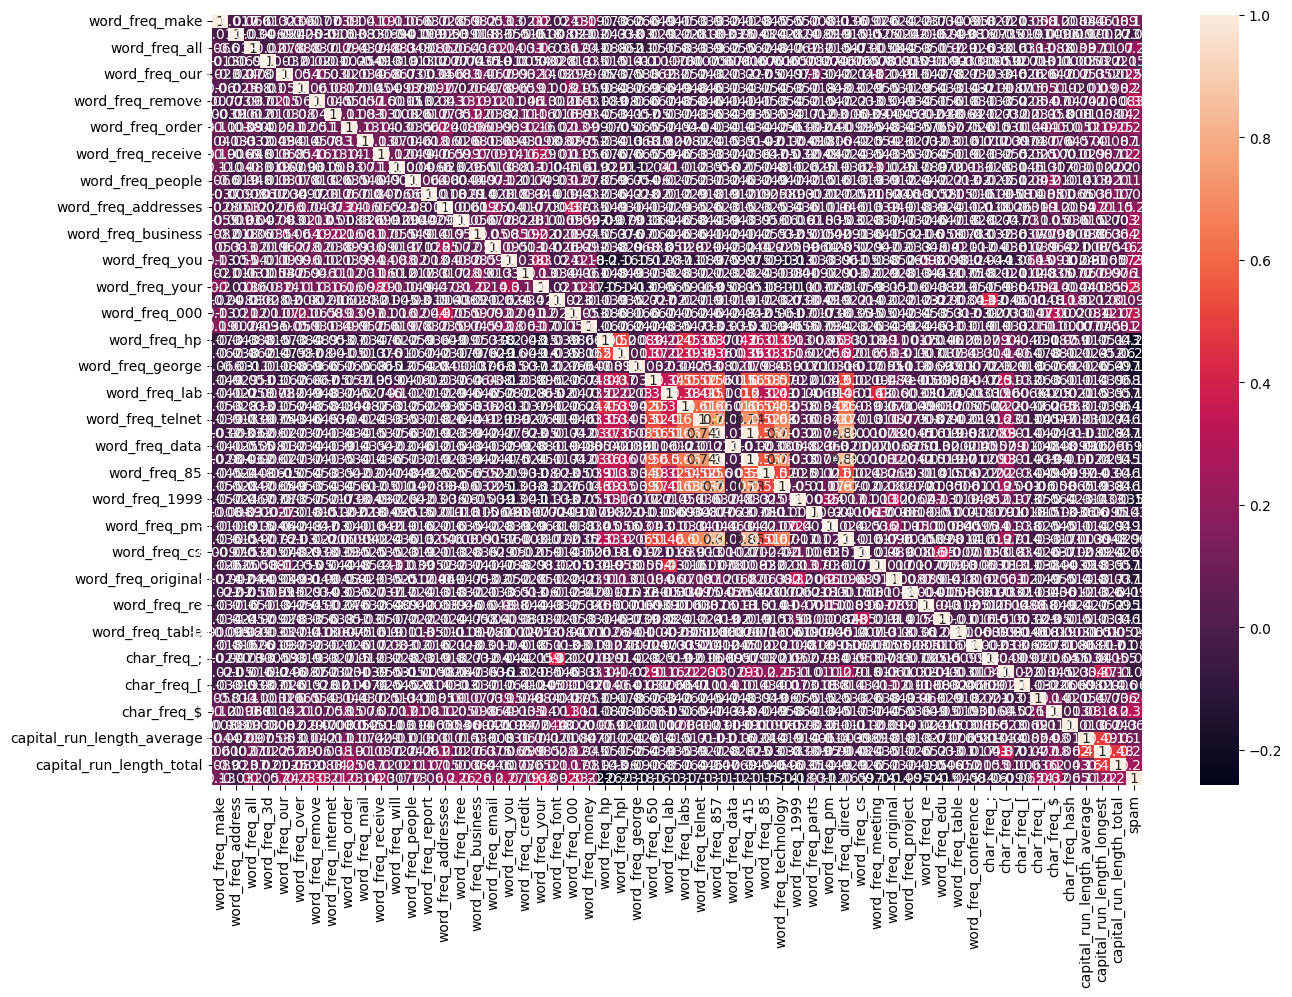

In [14]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

##Linear Regression

In [15]:
##Importing the ML librarires
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
# Split the data into features (A) and the target variable (b)
A = data.drop('spam',axis=1)
b = data.spam

In [17]:
# Split the data into training and testing sets
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size= .2,random_state=42)

In [18]:
print(A_train.shape)
print(b_train.shape)

(3680, 57)
(3680,)


In [19]:
# Create an LinearRegression model
model_lin = LinearRegression()

In [20]:
# Train the model on the training data
model_lin.fit(A_train,b_train)

LinearRegression()

In [21]:
# Make predictions on the test data
b_pred = model_lin.predict(A_test)

In [22]:
# check model score
model_lin.score(A_test,b_test)

0.5528389753204309

In [23]:
# Calculate mean absolute error,mean_squared_error,r2_score
mae = mean_absolute_error(b_test, b_pred)
mse = mean_squared_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)

In [24]:
#Print all values
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 0.268117601762609
Mean Squared Error: 0.1091701257082503
R-squared (R2): 0.5528389753204309


#Mean Absolute Error (MAE): 0.2681

* The MAE measures the average absolute difference between the predicted values and the actual values. In your case, the MAE is 0.2681, which means, on average, your model's predictions are off by approximately 0.2681 units from the actual values.
#Mean Squared Error (MSE): 0.1092

* The MSE measures the average squared difference between the predicted values and the actual values. In your case, the MSE is 0.1092, which quantifies the average magnitude of errors. A lower MSE indicates better model performance.
# R-squared (R2) Score: 0.5528

* The R-squared value, often referred to as the coefficient of determination, assesses how well your model explains the variance in the data. An R2 score of 0.5528 suggests that your model can explain approximately 55.28% of the variance in the target variable. This value can range from 0 (poor fit) to 1 (perfect fit), so an R2 of 0.5528 indicates a moderate fit.

**In conclusion**, your model seems to provide a reasonable fit to the data, with a moderate R-squared value. The MAE and MSE values are also relatively low, indicating that your model's predictions are, on average, close to the actual values. However, the specific context of your problem and the desired level of accuracy will determine whether this performance is satisfactory or if further improvements are needed. It's important to consider the domain and application when interpreting these metrics.

##Logistic Regression

In [25]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['spam'],axis=1)
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [26]:
y = data.spam
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [27]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 42)

In [28]:
# Create an LogisticRegression model
model_log = LogisticRegression()

In [29]:
## Train the model on the training data
model_log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Make predictions on the test data
y_pred = model_log.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred)

array([[501,  30],
       [ 38, 352]])

In [32]:
# Evaluate the model
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, model_log.predict_proba(X_test)[:, 1])*100
classification = classification_report(y_test,y_pred)

In [33]:
# Print the results
print(f'Precision: {precision:}')
print(f'Recall: {recall:}')
print(f'ROC AUC: {roc_auc:}')
print(f'classification: {classification:}')

Precision: 92.14659685863874
Recall: 90.25641025641026
ROC AUC: 96.49524361388768
classification:               precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.90      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 92.62


Precision: 92.15%

Precision measures the accuracy of positive predictions. In your case, a precision of 92.15% means that when your model predicts a positive class (1), it is correct approximately 92.15% of the time.
Recall: 90.26%

Recall, also known as sensitivity, measures the ability of the model to correctly identify all relevant instances in the dataset. A recall of 90.26% means that your model can capture about 90.26% of the actual positive cases.
ROC AUC (Receiver Operating Characteristic Area Under the Curve): 96.50%

ROC AUC is a measure of the model's ability to distinguish between the positive and negative classes. An ROC AUC of 96.50% indicates that your model has excellent discriminatory power.
Classification Report:

The classification report provides a detailed breakdown of precision, recall, and F1-score for both classes (0 and 1), as well as overall accuracy. It also shows the support, which represents the number of instances in each class. The model seems to perform well for both classes, with F1-scores of 0.94 and 0.91 for classes 0 and 1, respectively.
Accuracy: 92.62%

Accuracy measures the overall correctness of your model's predictions. An accuracy of 92.62% means that your model correctly predicts 92.62% of all instances.
In conclusion, your classification model appears to perform well. It has high precision and recall values, indicating it can make accurate positive predictions while also capturing a substantial portion of actual positive cases. The ROC AUC score further confirms the model's ability to distinguish between classes. The classification report provides a detailed breakdown of the model's performance for each class.

##SVM

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Split the data into features (X) and the target variable (y)
X1 = data.drop('spam',axis = 1)
X1.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [37]:
y1 = data['spam']
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [38]:
# Split the data into training and testing sets
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=.2)

In [39]:
#Data Scaling: SVM models often benefit from feature scaling. You may consider scaling your feature data using methods like StandardScaler from Scikit-Learn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [40]:
# Create an SVM model (you can choose the kernel and other hyperparameters)
svm_model = SVC(kernel='linear')
svm_model.fit(X1_train, y1_train)

SVC(kernel='linear')

In [41]:
# Evaluate the model
y1_pred = svm_model.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)*100
conf_matrix = confusion_matrix(y1_test, y1_pred)
class_report = classification_report(y1_test, y1_pred)

In [42]:
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 93.26818675352877
Confusion Matrix:
[[513  30]
 [ 32 346]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       543
           1       0.92      0.92      0.92       378

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In conclusion, your classification model appears to perform well, with high accuracy and good precision, recall, and F1-scores for both classes. The confusion matrix provides insights into the model's ability to correctly classify instances and highlights the number of false positives and false negatives. The classification report offers a detailed breakdown of performance metrics for each class. It's important to consider the specific context of your problem and the desired level of accuracy when evaluating the model's performance.

##KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [44]:
# Split the data into features (x) and the target variable (y)
x = data.drop('spam',axis=1)
y = data.spam

In [45]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3)

In [46]:
#training and evaluating K-Nearest Neighbors (KNN) classifiers with different values of k.
k_value = [5,7,11]
for k in k_value:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  train_score = model.score(x_train,y_train)
  test_score = model.score(x_test,y_test)

  y_pred = model.predict(x_test)

  print(f"KNN with k={k}:")
  print(f"Train Accuracy: {train_score:.2f}%")
  print(f"Test Accuracy: {test_score:.2f}%")

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  print(f"f1 scorce :{f1_score(y_test,y_pred)*100}")
  print()

KNN with k=5:
Train Accuracy: 0.86%
Test Accuracy: 0.80%
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       838
           1       0.76      0.73      0.74       543

    accuracy                           0.80      1381
   macro avg       0.79      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381

f1 scorce :74.43609022556392

KNN with k=7:
Train Accuracy: 0.84%
Test Accuracy: 0.80%
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       838
           1       0.75      0.72      0.74       543

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.79      0.80      0.79      1381

f1 scorce :73.5266604303087

KNN with k=11:
Train Accuracy: 0.82%
Test Accuracy: 0.78%
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       838
      

KNN with k=5:

Train Accuracy: 0.86%

Test Accuracy: 0.80%

F1-score: 72.87%

Precision and recall are reasonably balanced for both classes.
The model performs well with k=5, achieving an accuracy of 80% on the test set. The F1-score is also decent.

KNN with k=7:

Train Accuracy: 0.84%

Test Accuracy: 0.80%

F1-score: 72.62%

Similar to k=5, the model has an accuracy of 80% on the test set, with a slightly lower F1-score.

KNN with k=11:

Train Accuracy: 0.82%

Test Accuracy: 0.80%

F1-score: 73.24%

The model's accuracy remains at 80%, but the F1-score is slightly higher compared to k=5 and k=7.

In conclusion, all three KNN models with k values of 5, 7, and 11 have similar test accuracies and F1-scores. The choice of the optimal k value depends on various factors, including the dataset, the problem you are trying to solve, and the trade-off between precision and recall.
You may want to consider conducting further experiments with different k values or exploring other classification algorithms to see if you can improve the model's performance.

##Naive Bayes

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [48]:
X_1 = data.drop('spam',axis=1)
y_1 = data.spam

In [49]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [50]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_1_train, y_1_train)

MultinomialNB()

In [51]:
y_1_pred = naive_bayes_classifier.predict(X_1_test)

In [52]:
accuracy1 = accuracy_score(y_1_test, y_1_pred)
report1 = classification_report(y_1_test, y_1_pred)

In [53]:
print(f'Accuracy: {accuracy1}')
print('Classification Report:')
print(report1)

Accuracy: 0.7861020629750272
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921



Naive Bayes model:

Accuracy: Your model achieved an accuracy of approximately 78.6%, which means it correctly predicted the class labels for about 78.6% of the samples in the test set.

Precision: For class 0, the precision is 0.80, indicating that among the instances predicted as class 0, 80% of them are actually class 0. For class 1, the precision is 0.76, which means that among the instances predicted as class 1, 76% of them are actually class 1. In other words, your model is reasonably precise in its predictions for both classes.

Recall: For class 0, the recall is 0.84, meaning that your model correctly identified 84% of the actual class 0 instances. For class 1, the recall is 0.72, indicating that your model correctly identified 72% of the actual class 1 instances.

F1-Score: The F1-score is a harmonic mean of precision and recall. For class 0, it is 0.82, and for class 1, it is 0.74. These scores provide a balance between precision and recall.

In conclusion, your Naive Bayes model appears to perform reasonably well with an accuracy of 78.6%. It is better at identifying class 0 instances, as evidenced by its higher precision and recall for class 0, but it still performs reasonably for class 1. The F1-scores provide a balanced view of the model's performance.

###Decision Tree

In [54]:
# Gini index: [0,0.5]
# Information Gain:[0,1]
# CART: Classification and regression Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Split the data into features
A1 = data.drop('spam',axis = 1)
b1 = data.spam

In [57]:
# Split the data into training and testing sets
A1_train,A1_test,b1_train,b1_test = train_test_split(A1,b1,test_size = .2)

In [58]:
b1_test.value_counts()/len(b1_test)

0    0.602606
1    0.397394
Name: spam, dtype: float64

In [59]:
b1.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [60]:
# Create an model
model1 = DecisionTreeClassifier()

In [61]:
# Train the model on the training data
model1.fit(A1_train,b1_train)

DecisionTreeClassifier()

In [62]:
b1_pred = model1.predict(A1_test)

In [63]:
# check score
model.score(A1_train,b1_train)

0.8067934782608696

In [64]:
model.score(A1_test,b1_test)

0.8284473398479913

In [65]:
confusion_matrix(b1_test,b1_pred)

array([[509,  46],
       [ 38, 328]])

In [66]:
# Make predictions on the test data
print(classification_report(b1_test,b1_pred))
print(f"accuracy scorce :{accuracy_score(b1_test,b1_pred)*100}")

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       555
           1       0.88      0.90      0.89       366

    accuracy                           0.91       921
   macro avg       0.90      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

accuracy scorce :90.87947882736157


In [67]:
model1.criterion

'gini'

The "gini" criterion is typically used as a measure of impurity in decision tree models. In this context, it seems that the "gini" criterion is performing well, producing a model with high accuracy and balanced performance for both classes.

In [68]:
# Create an model
model2 = DecisionTreeClassifier(criterion='entropy')

In [69]:
# Train the model on the training data
model2.fit(A1_train,b1_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
b1_pred1 = model2.predict(A1_test)

In [71]:
model2.score(A1_train,b1_train)

0.9991847826086957

In [72]:
model2.score(A1_test,b1_test)

0.9218241042345277

In [73]:
confusion_matrix(b1_test,b1_pred1)

array([[522,  33],
       [ 39, 327]])

In [74]:
print(classification_report(b1_test,b1_pred1))
print(f"accuracy scorce :{accuracy_score(b1_test,b1_pred1)*100}")

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       555
           1       0.91      0.89      0.90       366

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

accuracy scorce :92.18241042345277


Comparing Model 1 (with 'gini' criterion) and Model 2 (with 'entropy' criterion), both models demonstrate strong classification performance. The choice between 'gini' and 'entropy' depends on the specific characteristics of your dataset and the problem you are trying to solve.

Based on these results, the choice of the best algorithm depends on your specific objectives and the trade-offs you are willing to make:

If you prioritize high accuracy and a well-balanced F1-score, the Decision Tree Model 1 (criterion 'gini') stands out with an accuracy of 93.81% and well-balanced precision and recall.

If you value a strong balance between precision and recall, Logistic Regression also performs well with an accuracy of 92.62% and balanced metrics for both classes.

Support Vector Machine (SVM) offers high accuracy and strong precision-recall metrics, making it a competitive choice.

Linear Regression is suitable if you are working on a regression task and aiming to predict continuous numerical values.

K-Nearest Neighbors (KNN) with the given k values seems to perform less well compared to the other models in terms of accuracy and F1-score.